100%|██████████| 3308/3308 [00:32<00:00, 100.75it/s]


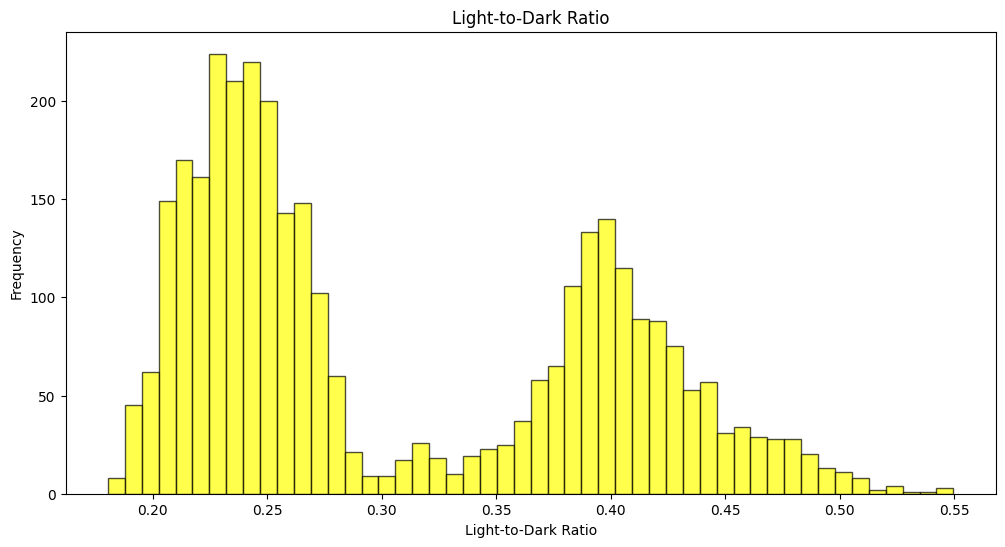

In [3]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm

data = {'brightness': [], 'darkness': []}

def calculate_light_dark_ratio(image_path, threshold=128):
    """Tính tỷ lệ sáng/tối của ảnh."""
    image = Image.open(image_path).convert('L')  # Chuyển ảnh sang grayscale
    np_image = np.array(image)

    # Xác định số lượng pixel sáng và tối
    light_pixels = np.sum(np_image >= threshold)  # Pixel sáng có giá trị >= 128
    dark_pixels = np.sum(np_image < threshold)    # Pixel tối có giá trị < 128
    
    # Tính tỷ lệ ánh sáng (light-to-dark ratio)
    if dark_pixels == 0:
        return float('inf')  # Nếu không có pixel tối, tỷ lệ là vô cùng
    return light_pixels / dark_pixels

def process_images_in_folder(folder_path, bright_prefix='cam_11', dark_prefix='cam_13', threshold=128):
    """Tính tỷ lệ sáng/tối cho các ảnh sáng và tối riêng biệt trong thư mục."""
    bright_dark_ratios = []

    for filename in tqdm(os.listdir(folder_path)):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff', '.gif')):  # Kiểm tra file ảnh hợp lệ
            image_path = os.path.join(folder_path, filename)
            
            # Tính tỷ lệ sáng tối
            ratio = calculate_light_dark_ratio(image_path, threshold)
            bright_dark_ratios.append(ratio)
            if ratio <= 0.31:
                data['darkness'].append(filename)
            else:  
                data['brightness'].append(filename)

    
    return bright_dark_ratios

def plot_light_dark_ratio_distribution(light_dark_ratios):
    """Vẽ histogram phân phối tỷ lệ sáng/tối cho ảnh sáng và ảnh tối."""
    plt.figure(figsize=(12, 6))

    # Vẽ histogram cho ảnh sáng
    plt.hist(light_dark_ratios, bins=50, edgecolor='black', alpha=0.7, color='yellow')
    plt.title('Light-to-Dark Ratio')
    plt.xlabel('Light-to-Dark Ratio')
    plt.ylabel('Frequency')

# Main script
folder_path = 'Private_test_traffic/private test'  # Đường dẫn đến thư mục chứa ảnh

# Tính tỷ lệ sáng/tối cho các ảnh sáng và ảnh tối trong thư mục
bright_dark_ratios = process_images_in_folder(folder_path)

# Vẽ histogram tỷ lệ sáng/tối cho cả ảnh sáng và ảnh tối
plot_light_dark_ratio_distribution(bright_dark_ratios)

In [53]:
import json
# Writing JSON data to a file
with open('split_lightness.json', 'w') as json_file:
    json.dump(data, json_file, indent=4)